# Geometry of abstraction - DNN for CIFAR100 recognition and information structure

The geometry of abstraction in hippocampus and prefrontal cortex <br>
Silvia Bernardi, Marcus K Benna, Mattia Rigotti, Jérôme Munuera, Stefano Fusi, Daniel Salzman <br>
bioRxiv 2018

In [1]:
import pdb
from tqdm import tqdm

import numpy as np
import pandas as pd

from numpy.random import shuffle

from matplotlib import pyplot as plt
%matplotlib widget

from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100

In [3]:
import os, sys
lib_path = os.path.abspath('../methods')
sys.path.insert(0, lib_path)

In [4]:
from model import Model, ImageDataset

In [5]:
import ssl
import urllib

#ssl._create_default_https_context = ssl._create_unverified_context
#urllib.request.urlopen('https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz')

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
filt_labels = range(12)
cifar_12 = ImageDataset(x_train, y_train, x_test, y_test, filt_labels=filt_labels, spl=0.15)

Loading MNIST data, unfolding square to long representation:

In [6]:
# Currently dichotomies will only be binary
cifar_parity = [list(map(lambda x: 2*x, range(6))), list(map(lambda x: 2*x + 1, range(6)))]
cifar_smallness = [range(0,6), range(6,12)]

In [7]:
cifar_12.build_dichLabels(cifar_smallness, 'smaller_than_6')
cifar_12.build_dichLabels(cifar_parity, 'parity')

cifar_12.hstack_dichs('parity', 'smaller_than_6')

In [8]:
cifar_12.train['y_ohe']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
cifar_12.train['dichs']['parity_hstack_smaller_than_6']

array([[ True, False, False,  True],
       [ True, False,  True, False],
       [False,  True, False,  True],
       ...,
       [ True, False, False,  True],
       [ True, False, False,  True],
       [ True, False, False,  True]])

In [10]:
 # Alright, let's start with a three layer NN
w_in = cifar_12.tot_dim
w_1 = 500
w_2 = 200
w_3 = 100
w_out = 4
max_epochs = 400

In [11]:
spl_size = 75
spl_ids = np.arange(cifar_12.n_train)
shuffle(spl_ids)
spl_ids = spl_ids[:spl_size]

cifar_12.spl = {
    'x': cifar_12.train['x'][spl_ids],
    'y': cifar_12.train['y'][spl_ids]
}

In [12]:
# Currently dichotomies will only be binary
cifar_range = [range(0,4), range(4,8), range(8,12)]

In [13]:
cifar_12.build_dichLabels(cifar_range, 'range_bins')

cifar_12.hstack_dichs('parity', 'range_bins')

In [14]:
dnn_ctg_hstack = Sequential([
    Dense(w_1, input_shape=(w_in,)),
    Activation('tanh'),
    Dense(w_2),
    Activation('tanh'),
    Dense(w_3),
    Activation('tanh'),
    Dense(5),
    Activation('tanh')
])

model_ctg_hstack = Model(dnn_ctg_hstack)

# Train the model, iterating on the data in batches of 32 samples
model_ctg_hstack.fit(cifar_12, dich_name='parity_hstack_range_bins', epochs=20, batch_size=32)

model_ctg_hstack.evaluate(cifar_12, dich_name='parity_hstack_range_bins', batch_size=128)

{'test_accuracy': 0.5, 'test_loss': 0.24336727917194367}

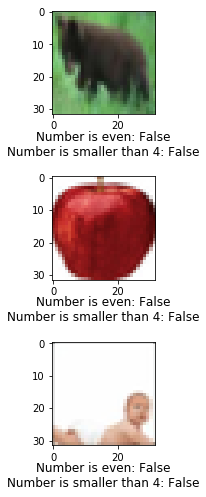

In [15]:
model_ctg_hstack.sample_eval(cifar_12, 3)

In [ ]:
%matplotlib widget
pca = PCA(n_components=2)
reduced_ctg_hstack_2, fig1 = model_ctg_hstack.get_repr(cifar_12, pca, plotting=True)
fig1.canvas.layout.width = '80%'
fig1.canvas.layout.height = '5000px'

In [ ]:
%matplotlib widget
pca3 = PCA(n_components=3)
reduced_ctg_hstack_3, fig2 = model_ctg_hstack.get_repr(cifar_12, pca3, dim=3, plotting=True)
fig2.canvas.layout.width = '80%'
fig2.canvas.layout.height = '5000px'